<a href="https://colab.research.google.com/github/Adnner-Esperilla-DEV/Programacion_101/blob/main/IA/Practica_03_IA_Inicializacion_de_Poblacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import random

# 1. DEFINICIÓN DE LAS FUNCIONES

In [3]:
def plot_tsp(cities, route):
    x = [node[0] for node in cities]
    y = [node[1] for node in cities]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  #Graficando los nodos

    # for i in range(len(cities)):
    #     plt.text(cities[i][0], cities[i][1], f'({round(cities[i][0],3)}, {round(cities[i][1],3)})', fontsize=8) #etiquetas en cada coordenada de ciudad


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([cities[node1][0], cities[node2][0]], [cities[node1][1], cities[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    #node1 = route[-1]
    #node2 = route[0]
    #plt.plot([cities[node1][0], cities[node2][0]], [cities[node1][1], cities[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

In [4]:
def fitness(solution):
  distance = 0
  for i in range(len(solution)-1):
    distance += distances[solution[i]][solution[i+1]]
  return distance

In [5]:
def create_initial_population(pop_size, num_cities):
  population = [] #vector de soluciones
  for i in range(pop_size):
    # crear solucion
    individual = list(np.random.permutation(num_cities)) #genotipos
    population.append(individual)

  return population

In [6]:
def fill_child(child, parent, end):
    size = len(parent)
    current_pos = (end + 1) % size
    for gene in parent:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

def ordered_crossover(parent1, parent2):
  size = len(parent1)
  child1 = [-1]*size
  child2 = [-1]*size

  start, end = sorted( random.sample(range(size), 2 ))

  child1[start:end+1] = parent2[start:end+1]
  child2[start:end+1] = parent1[start:end+1]

  fill_child(child1, parent1, end)
  fill_child(child2, parent2, end)

  return child1, child2

In [7]:
def swap_mutate(individual):
  i, j = np.random.choice(len(individual), 2, replace=False)
  new_individual = individual.copy()
  new_individual[i], new_individual[j] = individual[j], individual[i]
  return new_individual

In [8]:
def select_elite(population, all_fitness, elite_size):   # selecciona los que tengan el mejor fitness
  elite_indices = np.argsort(all_fitness)[:elite_size]
  return np.array(population)[elite_indices], elite_indices

## Funciones de selección


In [9]:
def rank_based_selection(population, all_fitness):
  all_fitness_sorted = sorted(all_fitness)
  rank = [i + 1 for i in range(len(all_fitness_sorted))]
  total_rank = sum(rank)
  selection_probs = [r / total_rank for r in rank]
  return population[np.random.choice(len(population), p=selection_probs)]

In [10]:
def roulete_wheel_selection_minimization(population, all_fitness):
    max_fitness = max(all_fitness)
    inverted_fitness = [max_fitness - f for f in all_fitness]  # invert fitness
    total_fitness = sum(inverted_fitness)
    selection_probs = [f / total_fitness for f in inverted_fitness]
    return population[np.random.choice(len(population), p=selection_probs)]

In [11]:
def fitness_scaling_selection(population, all_fitness):
  min_scale = 50
  max_scale = 100

  highest_fitness = max(all_fitness)
  inverted_fitness = [highest_fitness - f for f in all_fitness]

  min_fitness = min(inverted_fitness)
  max_fitness = max(inverted_fitness)

  a = (max_scale - min_scale) / (max_fitness - min_fitness)
  b = min_scale - a * min_fitness

  scaled_fitness = [a*f + b for f in inverted_fitness]
  total_fitness = sum(scaled_fitness)
  selection_probs = [f / total_fitness for f in scaled_fitness]
  return population[np.random.choice(len(population), p=selection_probs)]

In [12]:
def tournament_selection(population, all_fitness):
  tournament_size = 3
  tournament_indices = np.random.choice(len(all_fitness), tournament_size, replace=False)

  tournament_fitness = [all_fitness[i] for i in tournament_indices]

  winner_index = tournament_indices[np.argmin(tournament_fitness)]
  return population[winner_index]

## Funciones de Inicializacion

In [13]:
def random_initialization(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(np.random.permutation(num_cities)) # create a random solution
        population.append(individual)

    return population

In [14]:
def heuristic_initialization(solution):
  population = []
  for i in range(len(solution) - 1):
    for j in range(i + 1, len(solution)):
      new_solution = solution.copy()
      new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
      population.append(new_solution)

  return np.array(population)

In [15]:
def hybrid_initialization():
    percentage1 = round(pop_size*(70/100))
    percentage2 = round(pop_size*(30/100))

    population1 = random_initialization(pop_size, N)
    population2 = heuristic_initialization(initial_solution)

    population1 = sorted(population1, key=fitness)[:percentage1]
    population2 = sorted(population2, key=fitness)[:percentage2]


    return np.concatenate((population1, population2), axis=0)

## Ejecución del algoritmo genético

In [24]:
# Genetic Algorithm Process
def genetic_algorithm_experiment2(distance_matrix, mutation_rate, generations, initialization_type):
    # Número de ciudades
    num_cities = distance_matrix.shape[0]

    # Inicialización de la población
    if initialization_type == 'Random':
        population = random_initialization(pop_size, num_cities)  # Tamaño de población y número de ciudades
    elif initialization_type == 'Heuristic':
        population = heuristic_initialization(initial_solution)  # Población inicial heurística
    elif initialization_type == 'Hybrid':
        population = hybrid_initialization()  # Inicialización híbrida

    # Calcula los fitness para cada solución
    all_fitness = [fitness(solution) for solution in population]

    # Guarda las rutas para cada generación
    best_routes = []  # Lista para guardar las mejores rutas en cada generación
    best_fitness_values = []  # Lista para guardar los mejores valores de fitness

    for generation in range(generations):
        new_population = []

        # Selección de los mejores individuos (elite)
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Generación de la nueva población: crossover y mutación
        while len(new_population) < pop_size:
            parent1 = fitness_scaling_selection(population, all_fitness)
            parent2 = fitness_scaling_selection(population, all_fitness)
            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        # Actualiza la población y los valores de fitness
        population = new_population[:pop_size]
        all_fitness = [fitness(sol) for sol in population]

        # Guarda la mejor ruta y el mejor fitness en esta generación
        best_route_index = np.argmin(all_fitness)
        best_route = population[best_route_index]
        best_distance = all_fitness[best_route_index]

        best_routes.append(best_route)  # Guarda la mejor ruta
        best_fitness_values.append(best_distance)  # Guarda el mejor fitness

        # Guardar el progreso en cada generación (cada 50 generaciones)
        if generation % 50 == 0:
            if initialization_type == 'Random':
                random_history.append([generation, min(all_fitness)])
            elif initialization_type == 'Heuristic':
                heuristic_history.append([generation, min(all_fitness)])
            elif initialization_type == 'Hybrid':
                hybrid_history.append([generation, min(all_fitness)])

    # Devuelve la mejor ruta final y la mejor distancia
    final_best_route_index = np.argmin(all_fitness)
    final_best_route = population[final_best_route_index]
    final_best_distance = all_fitness[final_best_route_index]
    print(f"final_best_route_index: {final_best_route_index}")
    print(f"final_best_route: {final_best_route}")
    print(f"Final best distance: {final_best_distance}")
    return best_routes, best_fitness_values, final_best_route, final_best_distance

# 2. EJECUCIÓN DEL PROBLEMA

In [25]:
# HYPERPARAMETROS:

pop_size = 100 #cantidad de soluciones (población o genomas)
N = 100 #cantidad de ciudades
elite_size = 50 #elite de soluciones que se mantiene en cada generación
mutation_rate = 0.01 #probabilidad para la mutación de cada hijo
generations = 5000 #cantidad de generaciones o iteraciones


cities = np.random.rand(N, 2) #matriz de coordenadas para cada ciudad
distances = squareform(pdist(cities, 'euclidean')) #matriz con arrays con las distancias entre las ciudades

In [26]:
random_history = []
heuristic_history = []
hybrid_history = []

# Initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)

final_best_route_index: 0
final_best_route: [15 66 38 84 96 49 68  6 11 83 97 27 67 17 65 22 90 89 91 29 13 79 77 94
  3 40 87 14  0  9 41  7 76 52 85 82 78 32 51 37 80 26 21 23  4 59 47 88
 19 74 62 20 45 43 31 12 72 18 63 54 48 55 57 36 50 99 10 95 39 42  1 86
 34 30 64 61 44  2 28 93 56 75  5  8 71 58 98 24 33 53 69 46 16 35 73 60
 92 81 70 25]
Final best distance: 10.133749570537386


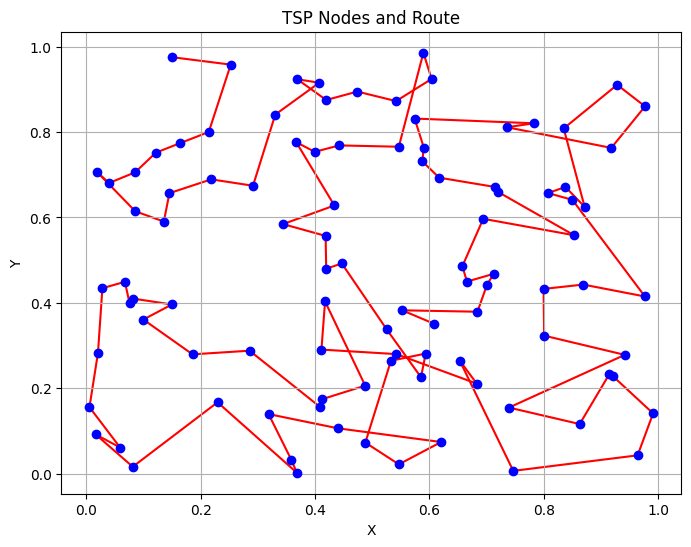

In [27]:
best_route, best_fitness_values, final_best_route, final_best_distance = genetic_algorithm_experiment2(distances, mutation_rate, generations, 'Random')
plot_tsp(cities, final_best_route)

final_best_route_index: 0
final_best_route: [86 34 30 64 10  1 95 50 99 39 36 78 42 55 57 76 70  9  0 63 54 26 43 31
 51 72 12 32 85 80 37 82  7 18 52 48 41 25 81 35 60 73 92 16 33 69  2 46
 61 44 71 93 53 28 75  5 56  8 58 29 89 13 90 22 77 40 14 87 67  3 94 24
 98 79 91 65 17 38 66 15 96 84 27 49 68  6 97 11 83 20 45 74 88 19 62 47
 59 23  4 21]
Final best distance: 10.56636751271174


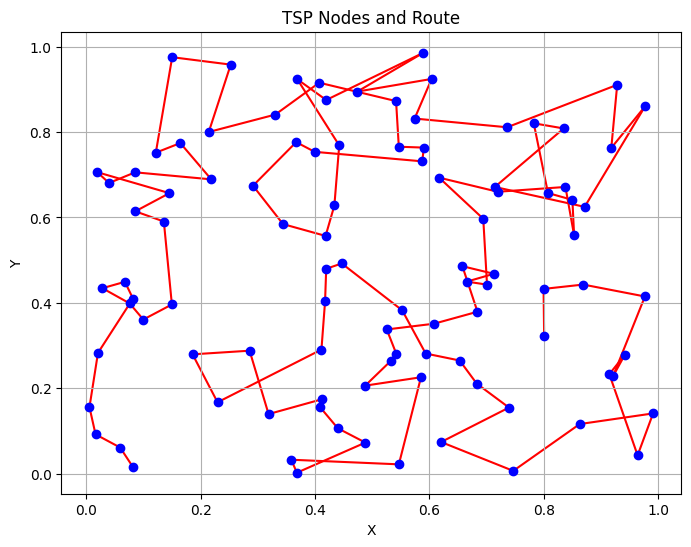

In [28]:
best_route, best_fitness_values, final_best_route, final_best_distance = genetic_algorithm_experiment2(distances, mutation_rate, generations, 'Heuristic')
plot_tsp(cities, final_best_route)

final_best_route_index: 0
final_best_route: [80 37 51 43 26 23  4 21 59 47 88 19 62 74 45 20 31 54 72 32 12 18 82 85
 78 42 55 25 81 30 64 95  1 34 86 10 99 50 39 36  7 52 76 57 41 48 63  0
  9 70 73 92 60 35 16 61 28 46  2 44  5 56 75 71 93  8 91 13 29 58 90  3
 77 94 17 38 67 87 27 84 96 49 97 83 11 68  6 15 66 22 65 89 79 24 98 53
 69 33 40 14]
Final best distance: 10.529105992380192


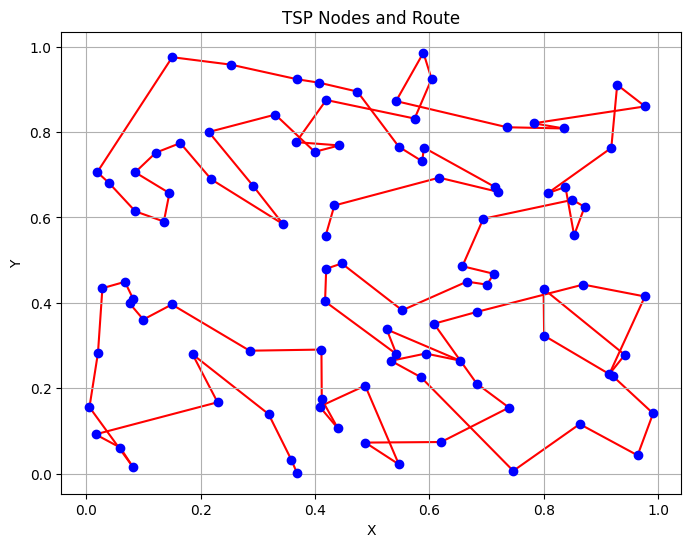

In [29]:
best_route, best_fitness_values, final_best_route, final_best_distance = genetic_algorithm_experiment2(distances, mutation_rate, generations, 'Hybrid')
plot_tsp(cities, final_best_route)

In [31]:
print(f"random_records: {random_history}")
print(f"heuristic_records: {heuristic_history}")
print(f"hybrid_records: {hybrid_history}")

random_records: [[0, 44.75046431740312], [50, 35.359074743154615], [100, 31.32521220793355], [150, 26.885049755053352], [200, 23.934464703812132], [250, 23.061996820424227], [300, 21.152121834569638], [350, 19.411636652579862], [400, 18.004605457878494], [450, 17.249193872216097], [500, 16.238488098607338], [550, 15.827129219895822], [600, 15.126237829276109], [650, 14.811211538433927], [700, 14.60505759191597], [750, 14.266311739250353], [800, 14.007626052158926], [850, 13.830940299001512], [900, 13.629297854329154], [950, 13.177099956055788], [1000, 13.177099956055788], [1050, 13.10365637684373], [1100, 13.10365637684373], [1150, 12.979949952613318], [1200, 12.870612286040569], [1250, 12.851369018711141], [1300, 12.717340160742673], [1350, 12.60372472596857], [1400, 12.524792112412781], [1450, 12.49505915962333], [1500, 12.222777700326278], [1550, 12.179492654531673], [1600, 12.023375635808597], [1650, 11.696950974091203], [1700, 11.660689433000893], [1750, 11.61442941255056], [1800,

# 3.GRÁFICA DEL PROBLEMA Inicializacion de Poblacion


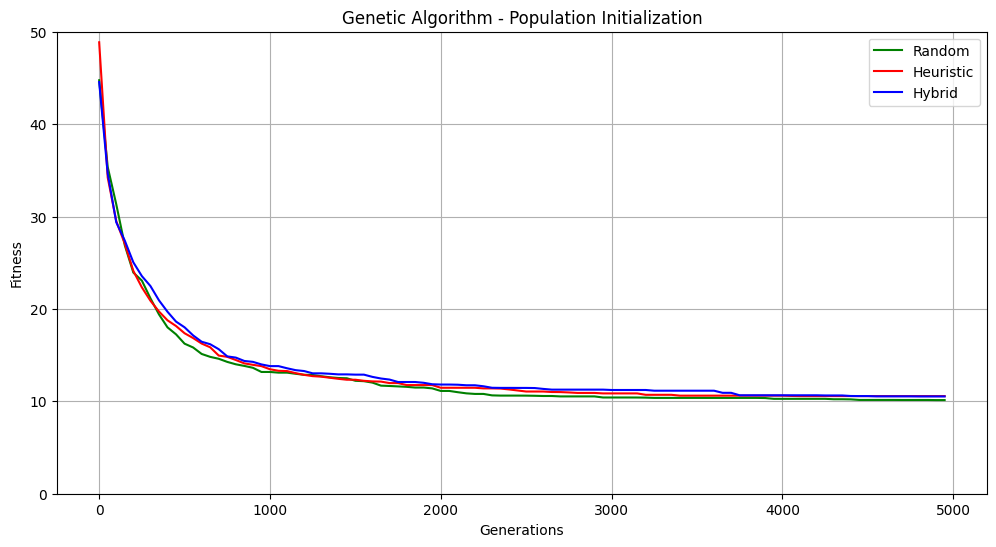

In [30]:
random_records = np.array(random_history)
heuristic_records = np.array(heuristic_history)
hybrid_records = np.array(hybrid_history)

# Extraer ejes para cada método
random_x, random_y = random_records[:, 0], random_records[:, 1]
heuristic_x, heuristic_y = heuristic_records[:, 0], heuristic_records[:, 1]
hybrid_x, hybrid_y = hybrid_records[:, 0], hybrid_records[:, 1]

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.title('Genetic Algorithm - Population Initialization')
plt.xlabel('Generations')
plt.ylabel('Fitness')

# Graficar cada método
plt.plot(random_x, random_y, label='Random', color='green')
plt.plot(heuristic_x, heuristic_y, label='Heuristic', color='red')
plt.plot(hybrid_x, hybrid_y, label='Hybrid', color='blue')

# Ajustar límites y agregar leyenda
plt.ylim(0, 50)
plt.legend()
plt.grid(True)
plt.show()